# Les imports

In [1]:
# --- Notebook : Modèle Linéaire - Cas de Tests de Régression ---
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# === Chargement de la bibliothèque Rust compilée ===
lib = ctypes.CDLL("../../../target/release/mymodel.dll")

In [ ]:
lib.create_perceptron_model.restype = ctypes.c_void_p
lib.create_perceptron_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]

lib.train_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
lib.train_perceptron_model.restype = None

lib.predict_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_perceptron_model.restype = ctypes.c_double


### Linear Simple :
        Linear Model : OK
   
        

Prédictions Perceptron (Rosenblatt) :
[1.0, 1.0] → attendu : 1, sortie : 1.000 → classe prédite : 1
[2.0, 3.0] → attendu : -1, sortie : -1.000 → classe prédite : -1
[3.0, 3.0] → attendu : -1, sortie : -1.000 → classe prédite : -1

Précision : 100.00%


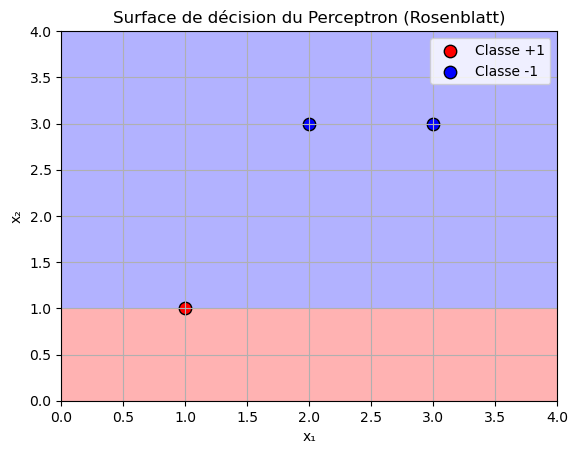

In [8]:
# === Données ===
X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
], dtype=np.float64)

Y = np.array([1, -1, -1], dtype=np.float64)  # Étiquettes en {-1, +1}

n_samples, n_features = X.shape


# === Déclarations des fonctions FFI ===
lib.create_perceptron_model.restype = ctypes.c_void_p
lib.create_perceptron_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]

lib.train_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
lib.train_perceptron_model.restype = None

lib.predict_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_perceptron_model.restype = ctypes.c_double


# === Création et entraînement du modèle ===
model_ptr = lib.create_perceptron_model(n_features, 0.01, 1000)

lib.train_perceptron_model(
    model_ptr,
    X.flatten().ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features,
)

# === Prédiction sur un point 
def predict(x):
    x_np = np.array(x, dtype=np.float64)
    return lib.predict_perceptron_model(
        model_ptr,
        x_np.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(x_np),
    )

# === Prédictions et affichage
print("Prédictions Perceptron (Rosenblatt) :")
Y_pred = []
for xi, yi in zip(X, Y):
    out = predict(xi)
    classe = 1 if out >= 0 else -1
    Y_pred.append(out)
    print(f"{xi.tolist()} → attendu : {int(yi)}, sortie : {out:.3f} → classe prédite : {classe}")

# === Calcul de la précision
Y_pred_binary = np.where(np.array(Y_pred) >= 0, 1, -1)
accuracy = np.mean(Y_pred_binary == Y)
print(f"\nPrécision : {accuracy * 100:.2f}%")

# === Visualisation de la surface de décision ===
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([predict(point) for point in grid])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label="Classe +1", edgecolor="k", s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="blue", label="Classe -1", edgecolor="k", s=80)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Surface de décision du Perceptron (Rosenblatt)")
plt.legend()
plt.grid(True)
plt.show()



### Linear Multiple :
        Linear Model : OK
        

Prédictions Perceptron (Rosenblatt) :
[1.3370861069626263, 1.8556428757689245] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.6587945476302646, 1.538792635777333] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.140416776398193, 1.1403950683025823] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.0522752509513795, 1.7795585311974418] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.541003510568888, 1.637265320016441] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.0185260448662221, 1.872918866945795] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.7491983767203796, 1.1911051996104485] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.1636424704863906, 1.1650640588680905] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.273818018663584, 1.4722807884690141] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.3887505167779042, 1.2621062261782376] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.5506676052501416, 1.1255444745868377] → atten

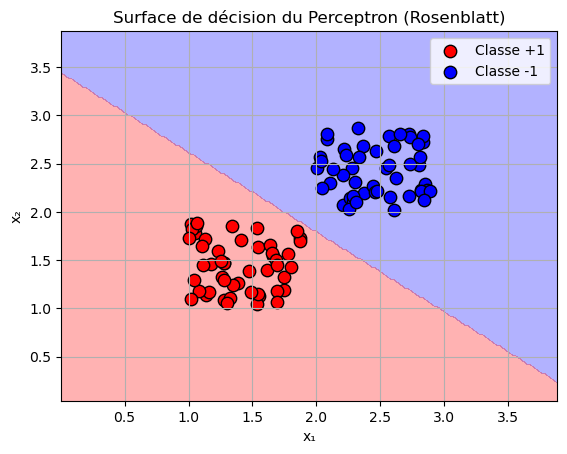

In [9]:
# === Données : 2 clusters autour de [1,1] (classe 1) et [2,2] (classe -1)
np.random.seed(42)  # pour reproductibilité

X = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
Y = np.concatenate([
    np.ones((50, 1)),
    -1.0 * np.ones((50, 1))
]).flatten() 

n_samples, n_features = X.shape


# === Déclarations des fonctions FFI ===
lib.create_perceptron_model.restype = ctypes.c_void_p
lib.create_perceptron_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]

lib.train_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
lib.train_perceptron_model.restype = None

lib.predict_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_perceptron_model.restype = ctypes.c_double


# === Création et entraînement du modèle ===
model_ptr = lib.create_perceptron_model(n_features, 0.01, 1000)

lib.train_perceptron_model(
    model_ptr,
    X.flatten().ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features,
)

# === Prédiction sur un point 
def predict(x):
    x_np = np.array(x, dtype=np.float64)
    return lib.predict_perceptron_model(
        model_ptr,
        x_np.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(x_np),
    )

# === Prédictions et affichage
print("Prédictions Perceptron (Rosenblatt) :")
Y_pred = []
for xi, yi in zip(X, Y):
    out = predict(xi)
    classe = 1 if out >= 0 else -1
    Y_pred.append(out)
    print(f"{xi.tolist()} → attendu : {int(yi)}, sortie : {out:.3f} → classe prédite : {classe}")

# === Calcul de la précision
Y_pred_binary = np.where(np.array(Y_pred) >= 0, 1, -1)
accuracy = np.mean(Y_pred_binary == Y)
print(f"\nPrécision : {accuracy * 100:.2f}%")

# === Visualisation de la surface de décision ===
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([predict(point) for point in grid])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label="Classe +1", edgecolor="k", s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="blue", label="Classe -1", edgecolor="k", s=80)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Surface de décision du Perceptron (Rosenblatt)")
plt.legend()
plt.grid(True)
plt.show()



### XOR :
        Linear Model    : OK

Prédictions Perceptron (Rosenblatt) :
[0.0, 0.0] → attendu : -1, sortie : 1.000 → classe prédite : 1
[0.0, 1.0] → attendu : 1, sortie : 1.000 → classe prédite : 1
[1.0, 0.0] → attendu : 1, sortie : -1.000 → classe prédite : -1
[1.0, 1.0] → attendu : -1, sortie : -1.000 → classe prédite : -1

Précision : 50.00%


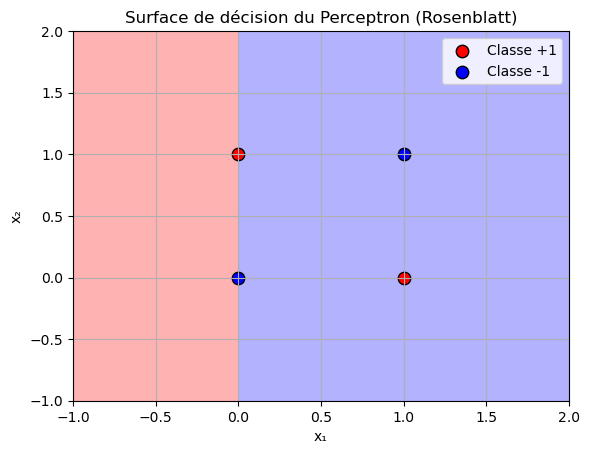

In [10]:
# === Données : 2 clusters autour de [1,1] (classe 1) et [2,2] (classe -1)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float64)

Y = np.array([
    -1,  # 0 XOR 0 = 0 → -1
    1,   # 0 XOR 1 = 1 → +1
    1,   # 1 XOR 0 = 1 → +1
    -1   # 1 XOR 1 = 0 → -1
], dtype=np.float64)

n_samples, n_features = X.shape


# === Déclarations des fonctions FFI ===
lib.create_perceptron_model.restype = ctypes.c_void_p
lib.create_perceptron_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]

lib.train_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
lib.train_perceptron_model.restype = None

lib.predict_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_perceptron_model.restype = ctypes.c_double


# === Création et entraînement du modèle ===
model_ptr = lib.create_perceptron_model(n_features, 0.01, 1000)

lib.train_perceptron_model(
    model_ptr,
    X.flatten().ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features,
)

# === Prédiction sur un point 
def predict(x):
    x_np = np.array(x, dtype=np.float64)
    return lib.predict_perceptron_model(
        model_ptr,
        x_np.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(x_np),
    )

# === Prédictions et affichage
print("Prédictions Perceptron (Rosenblatt) :")
Y_pred = []
for xi, yi in zip(X, Y):
    out = predict(xi)
    classe = 1 if out >= 0 else -1
    Y_pred.append(out)
    print(f"{xi.tolist()} → attendu : {int(yi)}, sortie : {out:.3f} → classe prédite : {classe}")

# === Calcul de la précision
Y_pred_binary = np.where(np.array(Y_pred) >= 0, 1, -1)
accuracy = np.mean(Y_pred_binary == Y)
print(f"\nPrécision : {accuracy * 100:.2f}%")

# === Visualisation de la surface de décision ===
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([predict(point) for point in grid])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label="Classe +1", edgecolor="k", s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="blue", label="Classe -1", edgecolor="k", s=80)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Surface de décision du Perceptron (Rosenblatt)")
plt.legend()
plt.grid(True)
plt.show()



### Cross :
        Linear Model    : KO
        

Prédictions Perceptron (Rosenblatt) :
[0.9536006570213187, -0.7785588133473687] → attendu : -1, sortie : -1.000 → classe prédite : -1
[-0.15490314337611077, -0.9159506496571894] → attendu : 1, sortie : 1.000 → classe prédite : 1
[0.4798082415338607, 0.8361531043983013] → attendu : -1, sortie : -1.000 → classe prédite : -1
[-0.43992534089902113, 0.7166833535982418] → attendu : -1, sortie : 1.000 → classe prédite : 1
[-0.41556353907620447, 0.8215403232878304] → attendu : -1, sortie : 1.000 → classe prédite : 1
[0.5079238071935679, 0.6098135536828773] → attendu : -1, sortie : -1.000 → classe prédite : -1
[-0.963986888799091, 0.9256207141480519] → attendu : -1, sortie : 1.000 → classe prédite : 1
[0.4533419841406465, -0.39049780922773336] → attendu : -1, sortie : -1.000 → classe prédite : -1
[0.6587893297176939, -0.4369576031701401] → attendu : -1, sortie : -1.000 → classe prédite : -1
[0.7455076791322559, -0.774839219176126] → attendu : -1, sortie : -1.000 → classe prédite : -1
[0.4073719

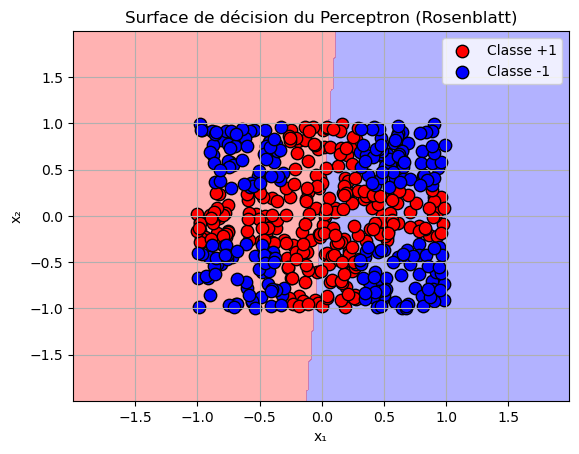

In [13]:
# Génération des données
X = np.random.random((500, 2)) * 2.0 - 1.0  # Points dans [-1, 1] x [-1, 1]

# Étiquette : +1 si dans une bande horizontale ou verticale
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X], dtype=np.float64)

n_samples, n_features = X.shape


# === Déclarations des fonctions FFI ===
lib.create_perceptron_model.restype = ctypes.c_void_p
lib.create_perceptron_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]

lib.train_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
lib.train_perceptron_model.restype = None

lib.predict_perceptron_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t
]
lib.predict_perceptron_model.restype = ctypes.c_double


# === Création et entraînement du modèle ===
model_ptr = lib.create_perceptron_model(n_features, 0.01, 1000)

lib.train_perceptron_model(
    model_ptr,
    X.flatten().ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    n_samples,
    n_features,
)

# === Prédiction sur un point 
def predict(x):
    x_np = np.array(x, dtype=np.float64)
    return lib.predict_perceptron_model(
        model_ptr,
        x_np.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(x_np),
    )

# === Prédictions et affichage
print("Prédictions Perceptron (Rosenblatt) :")
Y_pred = []
for xi, yi in zip(X, Y):
    out = predict(xi)
    classe = 1 if out >= 0 else -1
    Y_pred.append(out)
    print(f"{xi.tolist()} → attendu : {int(yi)}, sortie : {out:.3f} → classe prédite : {classe}")

# === Calcul de la précision
Y_pred_binary = np.where(np.array(Y_pred) >= 0, 1, -1)
accuracy = np.mean(Y_pred_binary == Y)
print(f"\nPrécision : {accuracy * 100:.2f}%")

# === Visualisation de la surface de décision ===
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([predict(point) for point in grid])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label="Classe +1", edgecolor="k", s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="blue", label="Classe -1", edgecolor="k", s=80)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Surface de décision du Perceptron (Rosenblatt)")
plt.legend()
plt.grid(True)
plt.show()

